In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import obspy as op
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt

In [24]:
st = op.read('example.sac',format='sac')
#st = op.read("https://examples.obspy.org/a02i.2008.240.mseed")

tr = st[0]
npts = tr.stats.npts
dt = tr.stats.delta

#Maybe we need to filter the trace?
tr = tr.filter('bandpass',freqmin=0.01,freqmax=10)

t = np.linspace(0, dt * npts, npts)
f_min = 0.01
f_max = 10
nf= 100

#obspy ctw
#8 is the tradeoff parameter between frequency and time resolution
#fmin and fmax represent the scales, nf  is the number of frequencies 
#between the two 
scalogram = cwt(tr.data, dt, 20, f_min, f_max,nf)

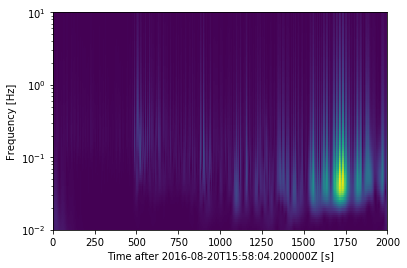

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(t,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)

ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()